## # ELEVATE LABS AI/ML INTERNSHIP
## Task-2 by Harsimran singh
### Dated - 26 june 2025
## Titanic dataset

#### ADDING CSV

In [62]:
import pandas as pd
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Cleaing the dataset 

In [63]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### using Label encoding

In [65]:
import numpy as np
df['mainroad']=np.where(df['mainroad'].str.contains('yes'),1,0)
df['guestroom']=np.where(df['guestroom'].str.contains('yes'),1,0)
df['basement']=np.where(df['basement'].str.contains('yes'),1,0)
df['hotwaterheating']=np.where(df['hotwaterheating'].str.contains('yes'),1,0)
df['airconditioning']=np.where(df['airconditioning'].str.contains('yes'),1,0)
df['prefarea']=np.where(df['prefarea'].str.contains('yes'),1,0)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [66]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [67]:
# one hot encoding for this column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [68]:
X = df[['furnishingstatus']]
encoded = encoder.fit_transform(X)


encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['furnishingstatus']))


df = pd.concat([df.drop('furnishingstatus', axis=1), encoded_df], axis=1)

In [69]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for compatibility
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [77]:
from sklearn.model_selection import train_test_split
y = df['price']
X= df.drop('price',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

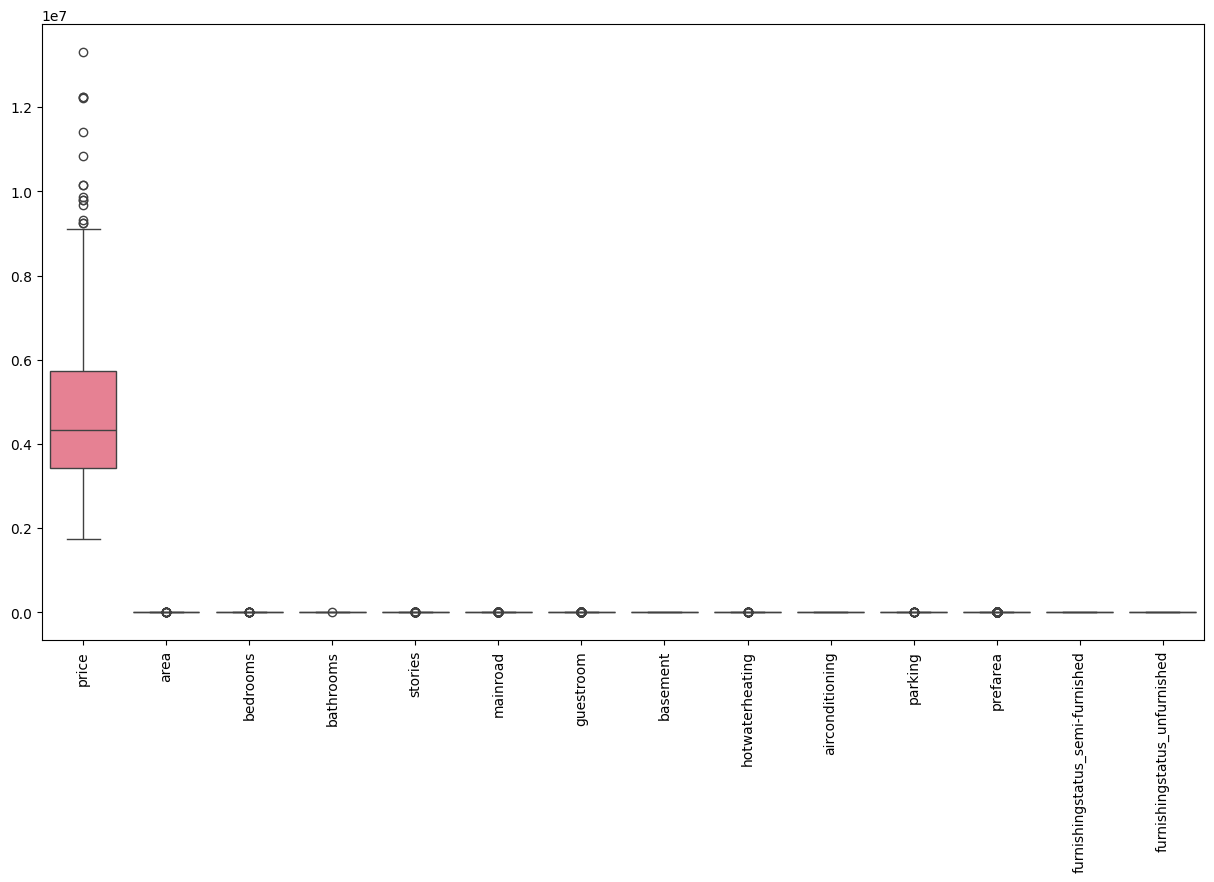

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             545 non-null    int64  
 1   bedrooms                         545 non-null    int64  
 2   bathrooms                        545 non-null    int64  
 3   stories                          545 non-null    int64  
 4   mainroad                         545 non-null    int64  
 5   guestroom                        545 non-null    int64  
 6   basement                         545 non-null    int64  
 7   hotwaterheating                  545 non-null    int64  
 8   airconditioning                  545 non-null    int64  
 9   parking                          545 non-null    int64  
 10  prefarea                         545 non-null    int64  
 11  furnishingstatus_semi-furnished  545 non-null    float64
 12  furnishingstatus_unfur

In [80]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0.0,0.0
1,8960,4,4,4,1,0,0,0,1,3,0,0.0,0.0
2,9960,3,2,2,1,0,1,0,0,2,1,1.0,0.0
3,7500,4,2,2,1,0,1,0,1,3,1,0.0,0.0
4,7420,4,1,2,1,1,1,0,1,2,0,0.0,0.0


mean_absolute_error 915955.8864463978
r2_score 0.6631280462200982
MSE: 1552389233075.0461
RMSE: 1245949.1294090005


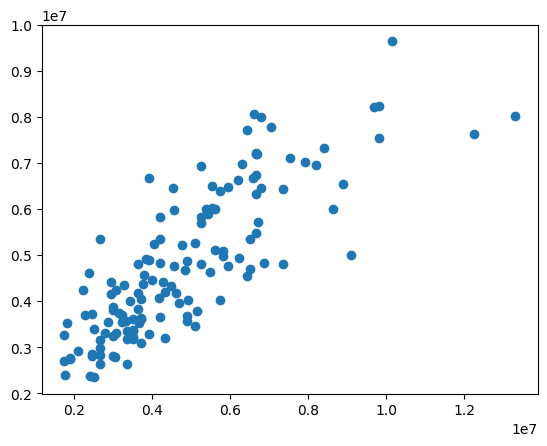

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

plt.scatter(y_test,y_pred)
plt.show()

mean_absolute_error 914974.8377673754
r2_score 0.6629414671479599
MSE: 1553249035559.2092
RMSE: 1246294.1208074477


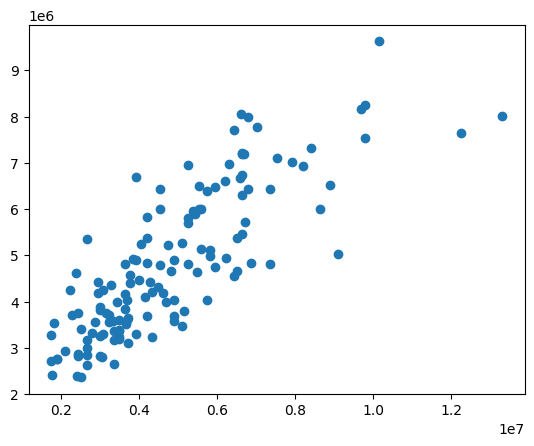

In [92]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("r2_score",score)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

plt.scatter(y_test,y_pred)
plt.show()


In [94]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 915955.8254747678
R2 Score: 0.6631280241014794
RMSE: 1245949.1703127818


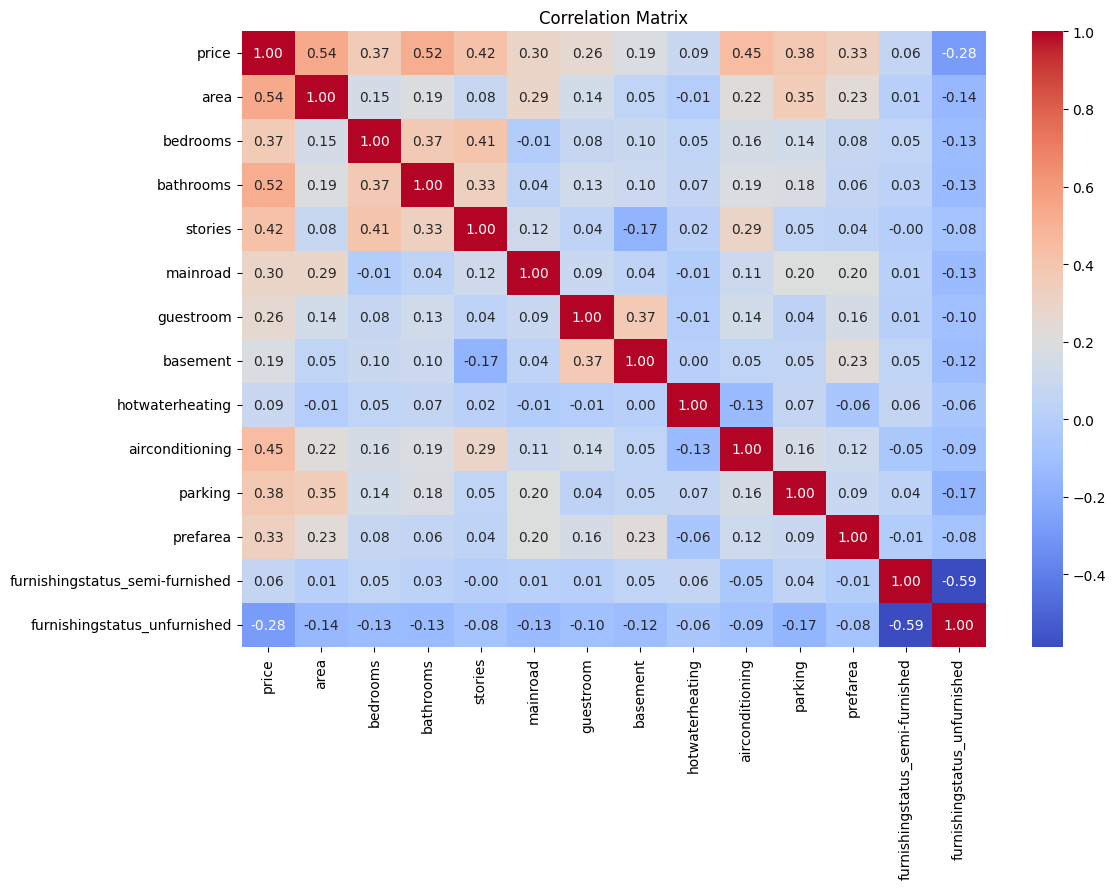

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numeric columns
corr_matrix = df.corr(numeric_only=True)

# Visualize
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
